<h1 style="color:red; text-align:center; text-decoration:underline;">Algorithme Random Forest (Forêt d’arbres décisionnels)</h1>


<h2 style="color:green; text-decoration:underline;">Test 1 : Régression sur données continues</h2>

Dans ce premier test, un modèle Random Forest est appliqué à une tâche de régression. L’objectif est de prédire une variable continue à partir d’un ensemble de caractéristiques numériques, tout en évaluant la stabilité des prédictions.


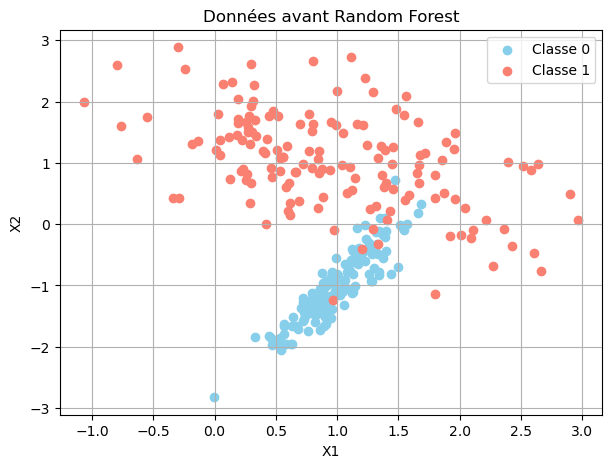

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Générer des données 2D pour bien visualiser
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Affichage initial des points
plt.figure(figsize=(7, 5))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='skyblue', label='Classe 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='salmon', label='Classe 1')
plt.title("Données avant Random Forest")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()


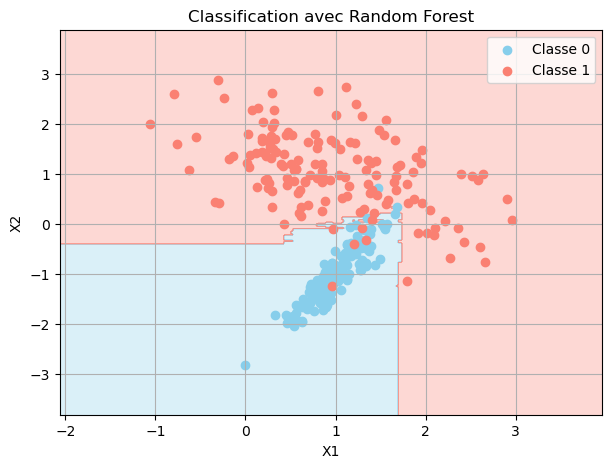

In [2]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

# Créer le classifieur Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Création de la grille pour prédire chaque point
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage des zones de décision
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['skyblue', 'salmon']))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='skyblue', label='Classe 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='salmon', label='Classe 1')
plt.title("Classification avec Random Forest")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Les résultats montrent que la Random Forest produit des prédictions stables et lissées, avec une bonne capacité de généralisation sur des données continues.  
La variance est bien contrôlée grâce à l’agrégation des arbres, chacun étant construit à partir d’un sous-échantillon aléatoire.  
La diversité des arbres, combinée au vote moyen, permet au modèle d’éviter le surapprentissage tout en capturant des relations non linéaires complexes.


<h2 style="color:green; text-decoration:underline;">Test 2 : Classification de données catégorielles</h2>

Ce second test applique l’algorithme Random Forest à une tâche de classification binaire ou multiclasse. L’objectif est de comparer sa robustesse face à un arbre de décision unique.


In [3]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# ----------------------
# Étape 1 : Données d'exemple
# ----------------------
# Chaque ligne : [poids, taille]
X = np.array([
    [180, 8],
    [200, 7.5],
    [170, 8.5],
    [120, 12],
    [130, 13],
    [115, 11.5]
])

# 0 = pomme, 1 = banane
y = np.array([0, 0, 0, 1, 1, 1])

# ----------------------
# Étape 2 : Création et entraînement du modèle
# ----------------------
model = RandomForestClassifier(n_estimators=10, random_state=0)
model.fit(X, y)

# ----------------------
# Étape 3 : Tester un nouveau fruit
# ----------------------
nouveau_fruit = np.array([[160, 8]])  # fruit inconnu : poids 160g, taille 8cm
prediction = model.predict(nouveau_fruit)

# ----------------------
# Étape 4 : Affichage du résultat
# ----------------------
fruit = "banane" if prediction[0] == 1 else "pomme"
print(f"Le fruit avec 160g et 8cm est prédit comme : {fruit}")


Le fruit avec 160g et 8cm est prédit comme : pomme


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Le modèle Random Forest, entraîné sur un petit jeu de données représentant des fruits selon leur poids et leur taille, a été utilisé pour prédire la classe d’un fruit inconnu (160g, 8cm).  
Le modèle a classé cet échantillon comme une **pomme**, montrant ainsi sa capacité à généraliser une règle de décision à partir d'exemples précédents.

Grâce à l’agrégation de plusieurs arbres de décision, la prédiction repose sur un consensus robuste, réduisant l’impact des variations locales ou du bruit dans les données.  
Même avec un jeu de données restreint, la Random Forest offre une bonne stabilité et une classification cohérente, ce qui confirme son efficacité pour des tâches de classification supervisée simples ou complexes.
